<a href="https://colab.research.google.com/github/Trantracy/Cat-Classification/blob/master/Logistic_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression from Scratch

Building a Logistic Regression model to classify image.

<img src="https://i.imgur.com/jZIAVRg.png" alt="cat-noncat" width="75%"/>



In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Load the data from h5 file
def load_dataset():
    train_dataset = h5py.File('/content/gdrive/My Drive/Student Files/FTMLE - Tonga/Data/catvnoncat/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/gdrive/My Drive/Student Files/FTMLE - Tonga/Data/catvnoncat/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

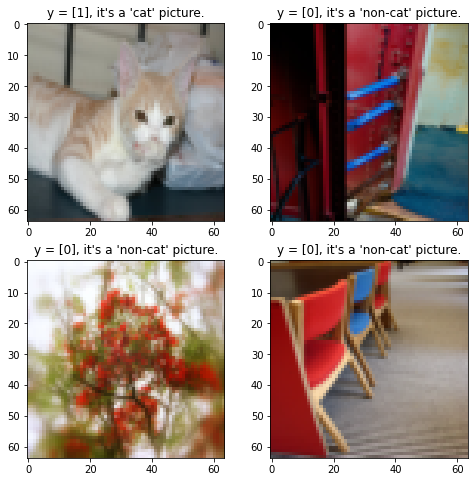

In [0]:
# Some some random images and their labels
plt.subplots(figsize = (8,8))
plt.subplot(221)
index_1 = np.random.randint(0,len(train_set_x_orig)) 
plt.imshow(train_set_x_orig[index_1])
plt.title("y = " + str(train_set_y_orig[:, index_1]) + ", it's a '" + classes[np.squeeze(train_set_y_orig[:, index_1])].decode("utf-8") +  "' picture.")

plt.subplot(222)
index_2 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_2])
plt.title("y = " + str(train_set_y_orig[:, index_2]) + ", it's a '" + classes[np.squeeze(train_set_y_orig[:, index_2])].decode("utf-8") +  "' picture.")

plt.subplot(223)
index_3 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_3])
plt.title("y = " + str(train_set_y_orig[:, index_3]) + ", it's a '" + classes[np.squeeze(train_set_y_orig[:, index_3])].decode("utf-8") +  "' picture.")

plt.subplot(224)
index_4 = np.random.randint(0,len(train_set_x_orig))
plt.imshow(train_set_x_orig[index_4])
plt.title("y = " + str(train_set_y_orig[:, index_4]) + ", it's a '" + classes[np.squeeze(train_set_y_orig[:, index_4])].decode("utf-8") +  "' picture.")

plt.show()

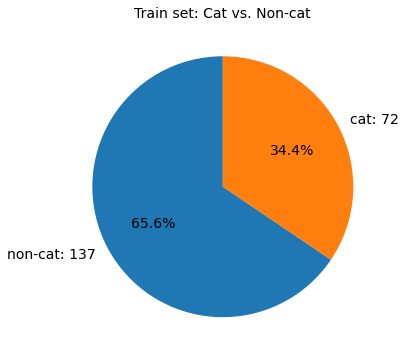

In [0]:
# Visualization the train set labels
unique, counts = np.unique(train_set_y_orig, return_counts = True)
dict1 = dict(zip(unique, counts))
plt.figure(figsize=(6,6))
plt.pie(x = counts, labels = ['non-cat: %s' % counts[0],'cat: %s' % counts[1]], autopct = '%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Train set: Cat vs. Non-cat', fontdict={'fontsize': 14})
plt.show()

In [0]:
# Convert X to 2D array
X_train = train_set_x_orig.flatten().reshape((len(train_set_x_orig),-1))
X_test = test_set_x_orig.flatten().reshape((len(test_set_x_orig),-1))

# Convert y to 1D array
y_train = train_set_y_orig.reshape((-1, 1))
y_test = test_set_y_orig.reshape((-1, 1))

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(209, 12288) (50, 12288) (209, 1) (50, 1)


In [0]:
# Normalization
# Scale to input to range 0, 1 so that it will be easier to converge
# We will discuss more about image preprocessing in the next module
X_train = X_train / 255
X_test = X_test / 255

## Building Logistic Regression model

It's time to design a simple algorithm to distinguish cat images from non-cat images.
You will build a Logistic Regression, using a Neural Network mindset. And you will see why **Logistic Regression is actually a very simple Neural Network**!

__Your task:__
- Build a Logistic Regression model using sklearn
- Build a Logistic Regression model from scratch
  - Print out the cost after each iteration
  - Visualize the costs during training process as a line plot

__Bonus:__ Test the model with some test images. Show the the images with the prediction (cat / non-cat).

We prepared some codes to help you read the test images and display them. Feel free to try with your own images.

Hints:
- Since the the test images will have different shape as the input of our Logistic Regression model, you will have the __resize these images__. You can do this using `cv2`. We will leave it to you to find out how.
- Don't forget to normalize the test images as well, as the our model is trained on normalized data.


In [0]:
# Model
class TongaLogisticRegression():
  def __init__(self, alpha, iterations, threshold=0.5):
    self.alpha = alpha
    self.iterations = iterations
    self.threshold = threshold

  def fit(self, X, y):
    self.m = X.shape[0]
    self.n = X.shape[1]
    self.w = np.zeros((self.n, 1))
    self.b = np.zeros((1, 1))
    self.X = X
    self.y = y
    self.a = 1 / (1 + np.exp(-(np.dot(self.X, self.w) + self.b))) # Sigmoid function

    for i in range(self.iterations):
      self.backward()

  def mae(self, y, a): # Mean absolute error
    return -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))

  def backward(self):

    dw = (-1/self.m) * (np.dot(self.X.T, (self.y - self.a))) # Partial derivative with MAE function
    db = (-1/self.m) * np.sum(self.y - self.a, keepdims = True)

    self.w = self.w - (self.alpha * dw)
    self.b = self.b - (self.alpha * db)

    # Forward propagation
    self.a = 1 / (1 + np.exp(-(np.dot(self.X, self.w) + self.b))) # Sigmoid function

    return self.mae(self.y, self.a)

  def predict(self, X):

    a = 1 / (1 + np.exp(-(np.dot(X, self.w) + self.b)))
    
    decision_boundary = np.vectorize(lambda a, threshold: 1 if a >= threshold else 0)  #vectorized decision_boundary function

    return decision_boundary(a, self.threshold).flatten() # Return 1 or 0

In [0]:
# Train the model with our data
model = TongaLogisticRegression(alpha = 0.01, iterations = 10000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [0]:
# Model Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


print("Mean Squared Error: %f" % mean_squared_error(y_test, predictions))
print("Accuracy Score: %f" % accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Mean Squared Error: 0.280000
Accuracy Score: 0.720000
Confusion Matrix:
[[13  4]
 [10 23]]
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        17
           1       0.85      0.70      0.77        33

    accuracy                           0.72        50
   macro avg       0.71      0.73      0.71        50
weighted avg       0.75      0.72      0.73        50



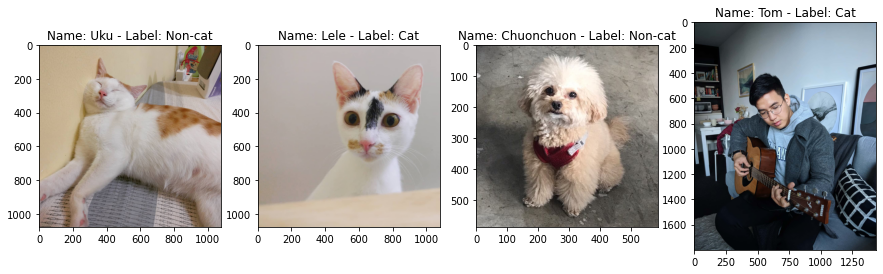

In [0]:
# Bonus
# cv2 is a Python library to handle computer vision problems.
# We will learn more about it and image preprocessing in a few weeks.
import cv2 

# Change this path
root_folder = '/content/gdrive/My Drive/Student Files/FTMLE - Tonga/Data/catvnoncat/test_images/'

image_names = ['uku.jpg',
               'lele.jpg',
               'chuonchuon.jpg',
               'tom.jpg']

plt.subplots(figsize = (15, 10))

for i, name in enumerate(image_names):

  # Read image
  image = cv2.imread(root_folder + name)

  # cv2's default color layer arrangement is BGR
  # We will need to convert it back to RGB
  # Comment out the code below to see the difference
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  # Resize image to match the model input
  resized = cv2.resize(image, (64,64)).flatten()

  # Predict the label of the image
  prediction = 'Cat' if model.predict(resized) == 1 else 'Non-cat'

  # Show image
  plt.subplot(1, len(image_names), i + 1)
  plt.title(f"Name: {name.split('.')[0].capitalize()} - Label: {prediction}")
  plt.imshow(image)

plt.show()